In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt


In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

wheat_monthly_file = pd.read_csv(r'C:\app\Data\IT\Python\Python_models/wheat_prices_may2019.csv', index_col=0, parse_dates=[0], date_parser=parser)
# wheat_monthly_file.index.name = 'Month' для присвоения имени шапки индекса






In [3]:
wheat_monthly_file.head()


,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
1960-01-01,1.63,..,1.63,..,..,..,0.14,0.4,..,3.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-02-01,1.63,..,1.63,..,..,..,0.14,0.4,..,3.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-03-01,1.63,..,1.63,..,..,..,0.14,0.4,..,3.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04-01,1.63,..,1.63,..,..,..,0.14,0.4,..,3.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-05-01,1.63,..,1.63,..,..,..,0.14,0.4,..,3.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
maize_monthly = wheat_monthly_file[['MAIZE']]
maize_monthly.head()



,MAIZE
1960-01-01,45.0
1960-02-01,44.0
1960-03-01,45.0
1960-04-01,45.0
1960-05-01,48.0


In [5]:
maize_monthly.tail()

,MAIZE
2018-12-01,167.44
2019-01-01,166.74
2019-02-01,169.52
2019-03-01,166.22
2019-04-01,161.49


In [6]:
maize_monthly.columns

Index(['MAIZE'], dtype='object')

In [7]:
print(type(maize_monthly.MAIZE))

<class 'pandas.core.series.Series'>


In [8]:
#maize_monthly.plot() - got error TypeError: Empty 'DataFrame': no numeric data to plot. !!!So we need to write:
maize_monthly=maize_monthly.astype(float)

Text(0.5, 1.0, 'World commodity prices on maize during 1960-2019 years by months')

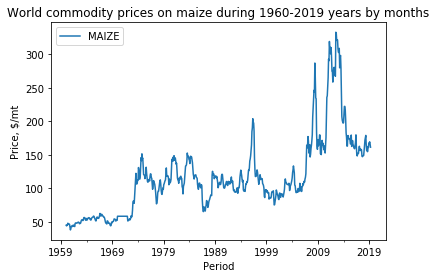

In [9]:
maize_monthly.plot()
plt.xlabel('Period')
plt.ylabel('Price, $/mt')
plt.title('World commodity prices on maize during 1960-2019 years by months')

Stationary means mean, variance and covariance is constant over periods


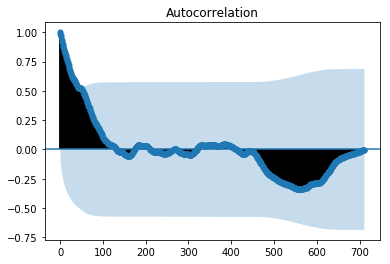

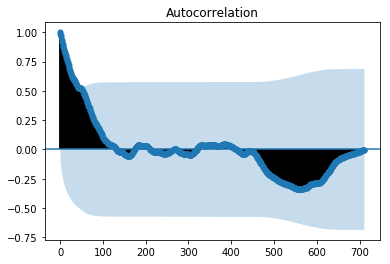

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(maize_monthly)

# Converting series to stationary

In [11]:
maize_monthly.head()

,MAIZE
1960-01-01,45.0
1960-02-01,44.0
1960-03-01,45.0
1960-04-01,45.0
1960-05-01,48.0


In [12]:
maize_monthly.shift(1)

,MAIZE
1960-01-01,NaN
1960-02-01,45.00
1960-03-01,44.00
1960-04-01,45.00
1960-05-01,45.00
1960-06-01,48.00
1960-07-01,47.00
1960-08-01,47.00
1960-09-01,47.00
1960-10-01,46.00


In [13]:
maize_monthly_diff = maize_monthly.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of Arima model

In [14]:
maize_monthly_diff = maize_monthly_diff[1:]
maize_monthly.diff()
#maize_monthly.diff.head() - если бы у нас былп шапка для индекса

,MAIZE
1960-01-01,NaN
1960-02-01,-1.00
1960-03-01,1.00
1960-04-01,0.00
1960-05-01,3.00
1960-06-01,-1.00
1960-07-01,0.00
1960-08-01,0.00
1960-09-01,-1.00
1960-10-01,-4.00


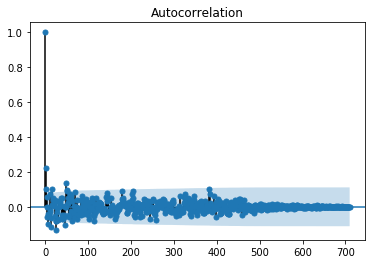

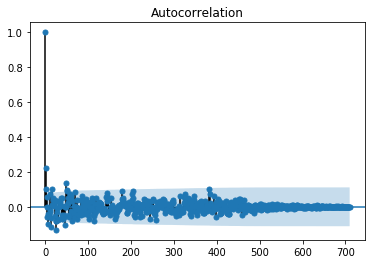

In [15]:
plot_acf(maize_monthly_diff)

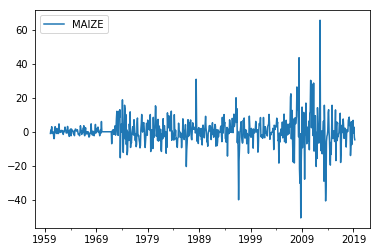

In [16]:
maize_monthly_diff.plot()

In [67]:
maize_monthly.iloc[576:, :]

,MAIZE
2008-01-01,206.66
2008-02-01,220.07
2008-03-01,234.36
2008-04-01,246.44
2008-05-01,243.46
2008-06-01,287.11
2008-07-01,265.34
2008-08-01,235.03
2008-09-01,233.85
2008-10-01,183.06


In [74]:
X = maize_monthly.values
train = X[575:688] #data as train data
test = X[687:] #data as test data
prediction = []

In [75]:
train.size

113

In [76]:
test.size

25

## Autoregressive AR Model

In [21]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [77]:
predictions = model_ar_fit.predict(start=89, end=113)

In [48]:
test

array([[156.44],
       [158.59],
       [157.93],
       [157.51],
       [148.5 ],
       [147.29],
       [148.62],
       [148.7 ],
       [148.98],
       [155.84],
       [163.36],
       [172.  ],
       [175.6 ],
       [179.09],
       [165.07],
       [156.46],
       [162.37],
       [154.8 ],
       [160.26],
       [160.69],
       [167.44],
       [166.74],
       [169.52],
       [166.22],
       [161.49]])

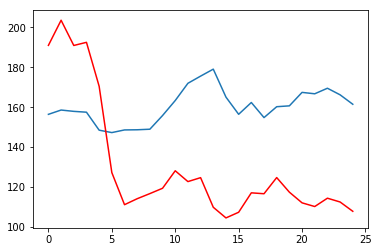

In [78]:
plt.plot(test)
plt.plot(predictions, color='red')

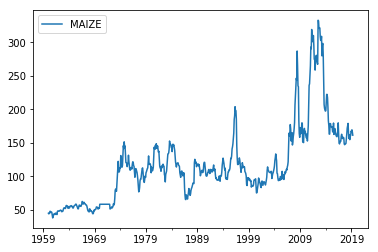

In [50]:
maize_monthly.plot()

## ARIMA Model

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [168]:
#p,d,q p = periods taken for autoregressive model
#d -> Integrated order, difference
#q - periods in moving average model
model_arima =ARIMA(train, order=(8, 1, 6))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

949.7846919683543


In [169]:
predictions=model_arima_fit.forecast(steps=25) [0]
predictions

array([157.77782301, 160.38089565, 163.70717516, 159.25245418,
       155.38159453, 155.44790261, 148.94157431, 149.49252583,
       151.75916843, 154.4578497 , 156.02446935, 160.00942193,
       160.08630141, 155.4969625 , 155.14106538, 150.22247094,
       147.75688147, 147.82553263, 150.47470811, 152.13783869,
       155.17696535, 158.4252473 , 155.63176382, 154.72004234,
       151.18284744])

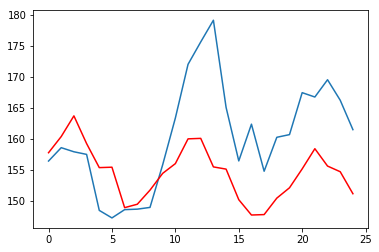

In [170]:
plt.plot(test)
plt.plot(predictions, color='red')

As we can see Arima model doesn't give accurate forecast for agricultural commodity prices (in this case wheat, retrospective period is from January 2008), because it has many factors infuencing on it each year in different ways and give very wide range of results. If to see at the picture we got the average forecast of real prices on April 1, 2017 - April 1, 2019. So it requires the other kind of model.

In [120]:
mean_squared_error(test, predictions)

122.51655202417197

In [31]:
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0,

In [131]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1240.49077430936
(0, 0, 1) 1120.9749143184076
(0, 1, 0) 933.840371657405
(0, 1, 1) 932.749631770037
(0, 1, 2) 933.7680808448947
(0, 1, 3) 935.4088041769405
(0, 1, 4) 937.1987207033917
(0, 1, 5) 939.1205361005439
(0, 1, 6) 940.3510927654052
(0, 1, 7) 939.3725826206023
(0, 1, 8) 940.796169483318
(0, 1, 9) 942.7765179906576
(0, 2, 0) 979.9393627864849
(0, 2, 1) 932.2988560390698
(0, 2, 2) 931.1067662205021
(1, 0, 0) 944.2504740994352
(1, 0, 1) 942.6103116990132
(1, 0, 2) 943.2274639687953
(1, 0, 3) 944.5536067763608
(1, 0, 4) 946.0011142482344
(1, 0, 5) 947.2167976332901
(1, 0, 6) 948.975526729555
(1, 0, 7) 949.1460949532268
(1, 0, 8) 950.7237534608714
(1, 0, 9) 952.5388072654216
(1, 1, 0) 932.1905526787627
(1, 1, 1) 933.4471558242362
(1, 2, 0) 956.0064359880296
(1, 2, 1) 930.4893516787943
(1, 2, 2) 931.5814224421324
(1, 2, 3) 933.5072932904645
(1, 2, 4) 935.4059784833331
(2, 0, 0) 941.7470084787822
(2, 0, 1) 942.0587995995882
(2, 0, 2) 944.0197613280234
(2, 0, 3) 945.9123500576